In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Kredivo.csv')

In [4]:
df.head

<bound method NDFrame.head of               userName  score                   at  \
0      Pengguna Google      5  2024-09-08 02:58:28   
1      Pengguna Google      5  2024-09-08 02:58:08   
2      Pengguna Google      1  2024-09-08 02:56:44   
3      Pengguna Google      5  2024-09-08 02:55:35   
4      Pengguna Google      5  2024-09-08 02:54:51   
...                ...    ...                  ...   
99995   Konslet gaming      2  2024-02-28 04:54:05   
99996       Jhar Ketie      5  2024-02-28 04:53:37   
99997   Yoyok Haryanto      4  2024-02-28 04:51:08   
99998     Joko Prahoro      3  2024-02-28 04:50:36   
99999   Andry Suherman      5  2024-02-28 04:48:37   

                                                 content  
0      Kredivo sangan membatu thebest bnget. Tapi ada...  
1                                            Membantu...  
2      Perhatian ,Tolong para pengguna dan yg punya a...  
3                                                   Kren  
4      aplikasi yang sanga

In [5]:
df.shape

(100000, 4)

In [6]:
df.isnull().sum()

userName    0
score       0
at          0
content     0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of               userName  score                   at  \
0      Pengguna Google      5  2024-09-08 02:58:28   
1      Pengguna Google      5  2024-09-08 02:58:08   
2      Pengguna Google      1  2024-09-08 02:56:44   
3      Pengguna Google      5  2024-09-08 02:55:35   
4      Pengguna Google      5  2024-09-08 02:54:51   
...                ...    ...                  ...   
99995   Konslet gaming      2  2024-02-28 04:54:05   
99996       Jhar Ketie      5  2024-02-28 04:53:37   
99997   Yoyok Haryanto      4  2024-02-28 04:51:08   
99998     Joko Prahoro      3  2024-02-28 04:50:36   
99999   Andry Suherman      5  2024-02-28 04:48:37   

                                                 content  
0      Kredivo sangan membatu thebest bnget. Tapi ada...  
1                                            Membantu...  
2      Perhatian ,Tolong para pengguna dan yg punya a...  
3                                                   Kren  
4      aplikasi yang san

In [2]:
df = df.dropna

Statistik dasar skor:
count    97614.000000
mean         4.444403
std          1.313328
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64


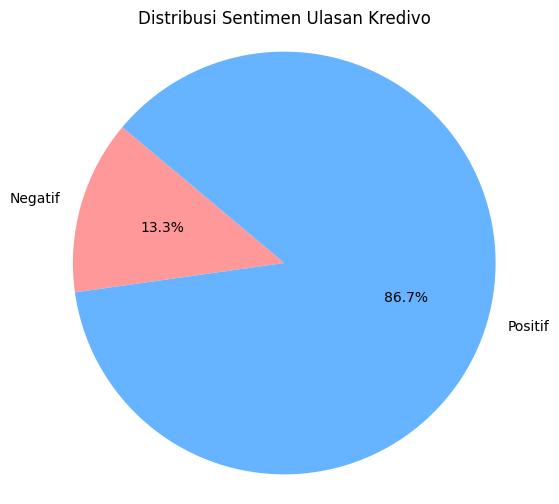


Contoh Ulasan Positif:
1. terimakasih kredivo

2. ok sip

3. Semakin sukses kredivo

4. Sangat membantu

5. Jos

Contoh Ulasan Negatif:
1. Jatuh tempo tgl 11 dah di bayar tanggal 5 kena blokir lah...cuma bisa buat belanja tp pas di belanjaiin malah di tolak terus alasan keamanan ...sampe melanggar lah...alhasil di tangguh kan .. dah lama pake kredivo jadi bikin kecewa

2. Mohon hapus data data saya baru daftar udah GK acc...kelihatan kalau mau nipu yaa...atas nama Adi wiratmoko hapus data data saya jngn di salah gunakan

3. Kenaikan limit selalu ditolak. Percuma bayar tagihan selalu diawal.

4. Limit masih tersedia tapi tidak bisa di gunakan

5. Bagaimana cara ngebatalin pinjaman ya kak ? Tapi data sudah ditulis



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Kredivo.csv")

df = df.dropna(subset=["content"])

df = df[df['score'] != 3]
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

print("Statistik dasar skor:")
print(df['score'].describe())

sentiment_counts = df['sentiment'].value_counts().sort_index()
labels = ['Negatif', 'Positif']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribusi Sentimen Ulasan Kredivo")
plt.axis("equal")
plt.savefig("distribusi_sentimen_kredivo.png")
plt.show()

print("\nContoh Ulasan Positif:")
for i, review in enumerate(df[df['sentiment'] == 1].sample(5, random_state=1)['content']):
    print(f"{i+1}. {review}\n")

print("Contoh Ulasan Negatif:")
for i, review in enumerate(df[df['sentiment'] == 0].sample(5, random_state=1)['content']):
    print(f"{i+1}. {review}\n")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["positif", "negatif"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Positif", "Negatif"],
                yticklabels=["Positif", "Negatif"])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [10]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["positif", "negatif"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Positif", "Negatif"],
                yticklabels=["Positif", "Negatif"])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
metrics = ['Akurasi', 'Presisi', 'Recall', 'F1-score']

nb_values = [0.808, 0.77, 0.89, 0.82]   # Naive Bayes
svm_values = [0.833, 0.81, 0.88, 0.84]  # SVM

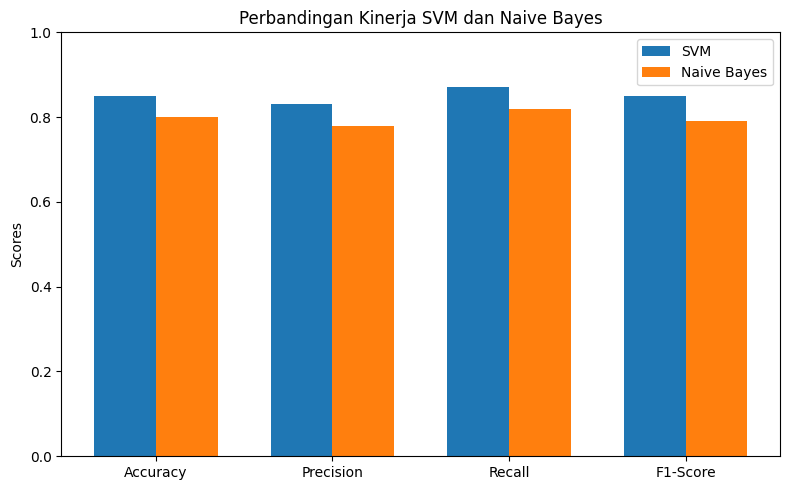

In [14]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [0.85, 0.83, 0.87, 0.85]
nb_scores = [0.80, 0.78, 0.82, 0.79]

x = np.arange(len(metrics))  # [0, 1, 2, 3]
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, svm_scores, width, label='SVM')
plt.bar(x + width/2, nb_scores, width, label='Naive Bayes')

plt.ylabel('Scores')
plt.title('Perbandingan Kinerja SVM dan Naive Bayes')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

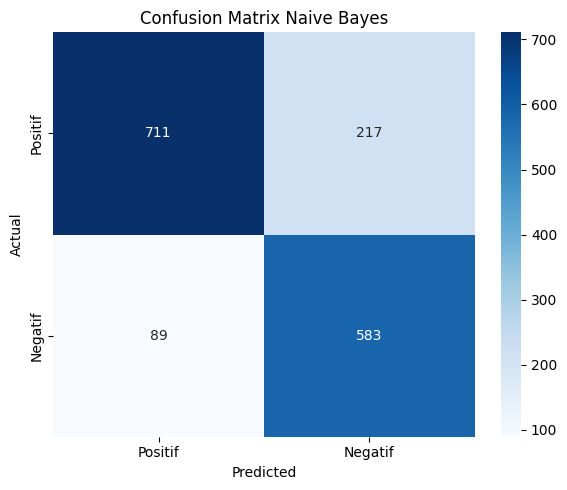

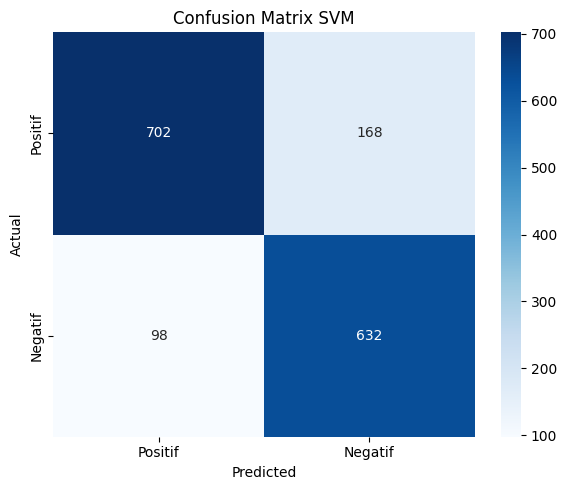

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

nb_cm = np.array([[711, 217],
                  [89,  583]])

svm_cm = np.array([[702, 168],
                   [98,  632]])

labels = ['Positif', 'Negatif']

def plot_confusion(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion(nb_cm, 'Naive Bayes')

plot_confusion(svm_cm, 'SVM')
